In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


ImportError: ignored

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/drive/MyDrive/SkinCancerDetection/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/SkinCancerDetection/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


LOAD USING KERAS PREPROCESSING

CREATING A DATASET FROM THE GIVEN INFO 

In [6]:
batch_size = 32
img_height = 180
img_width = 180


In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory (
    data_dir_train, seed = 123, 
    validation_split = 0.2, 
    subset = 'training', 
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
     data_dir_train, seed = 123, 
    validation_split = 0.2, 
    subset = 'validation', 
    image_size = (img_height,img_width),
    batch_size = batch_size
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**VISUALIZE THE DATA**

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

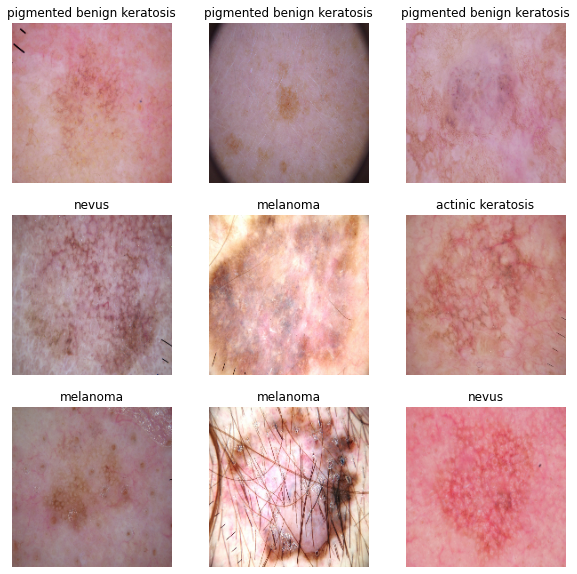

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#CREATE THE MODEL 
###To Do: Create a CNN Model which can accurately detect 9 classes present in the dataset. 

In [15]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [18]:
noclasses = 9 
input_shape = (180,180,3)
activ = 'relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(noclasses, activation='softmax'))


#*COMPILING THE MODEL *

In [19]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics =['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                  

In [24]:
epochs = 20

history = model.fit(train_ds,
                    validation_data = val_ds,
                    batch_size = 32,
                    epochs=epochs)

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 1.9623 - accuracy: 0.2640

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 228s 4s/step - loss: 1.9623 - accuracy: 0.2640 - val_loss: 1.7778 - val_accuracy: 0.4318
Epoch 2/20
56/56 [==============================] - 166s 3s/step - loss: 1.7058 - accuracy: 0.3901 - val_loss: 1.6053 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 166s 3s/step - loss: 1.5491 - accuracy: 0.4520 - val_loss: 1.4485 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 165s 3s/step - loss: 1.4320 - accuracy: 0.5000 - val_loss: 1.4777 - val_accuracy: 0.4855
Epoch 5/20
56/56 [==============================] - 166s 3s/step - loss: 1.3978 - accuracy: 0.5006 - val_loss: 1.4534 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 166s 3s/step - loss: 1.2890 - accuracy: 0.5396 - val_loss: 1.4380 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 165s 3s/step - loss: 1.2025 - accuracy: 0.5871 - val_loss: 1.5651 - val_accuracy: 0.4765
Epoch 8/20
56/56 [======

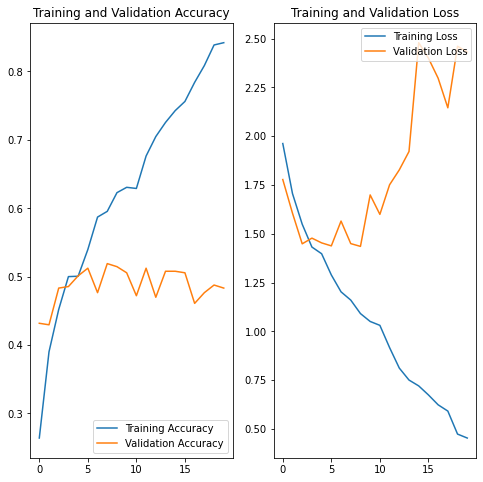

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Findings - Model 1 **
1. The model is clearly overfitting as you can see a massive divergence in the train , and validation accuracies
2. The accuracy on the training data is a positive point, but requires fine tuning because the network seems to be remembering information

In [28]:
data_augment = keras.Sequential ([
                                  layers.experimental.preprocessing.RandomFlip(mode = 'horizontal_and_vertical', input_shape= (img_height, img_width,3)),
                                  layers.experimental.preprocessing.RandomRotation(0.15,fill_mode = 'reflect')
])


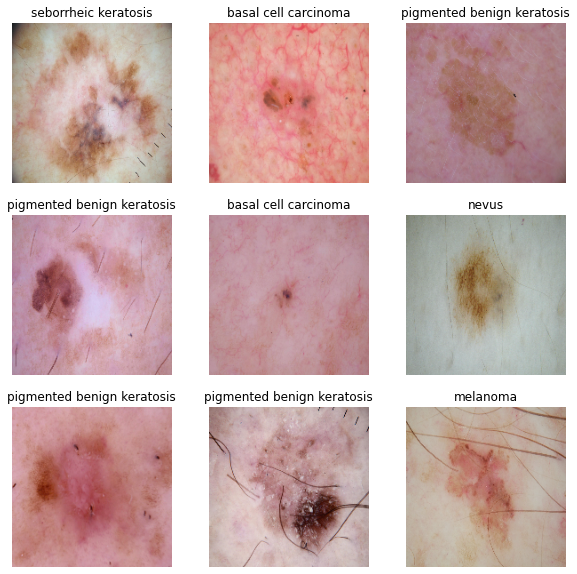

In [29]:
plt.figure (figsize = (10,10))
for images, labels in train_ds.take(1):
  for i in range (9):
      ax= plt.subplot(3,3, i + 1)
      plt.imshow (data_augment(images)[i].numpy().astype('uint8'))
      plt.title(class_names[labels[i]])
      plt.axis('off')

In [33]:
noclasses = 9 
input_shape = (180,180,3)

model = Sequential([data_augment, layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))])
model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', input_shape = input_shape))
model.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu',input_shape = input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(noclasses, activation='softmax'))

In [34]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics =['accuracy'])


In [36]:
epochs = 20
history = model.fit(
    train_ds, 
    validation_data = val_ds, 
    epochs=epochs
)

Epoch 1/20
 2/56 [>.............................] - ETA: 3:27 - loss: 1.2138 - accuracy: 0.5312

KeyboardInterrupt: ignored

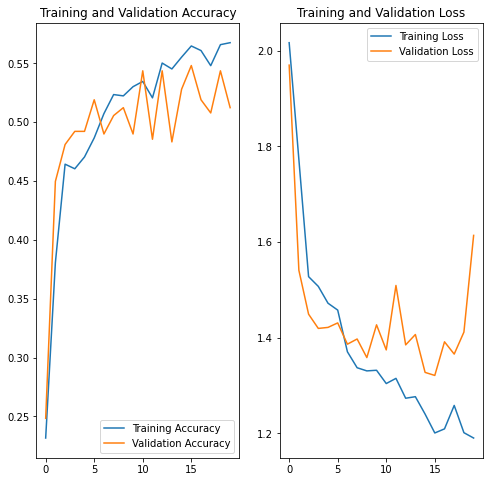

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**FINDINGS FROM THE MODEL**
1. The training and validation accuracies are not converging. 
2. The overfitting model from before has been rectified. 
3. Further processes could help improve model accuracy even further 

In [43]:
path_list = []
lesion_list = []
for i in class_names:
  for j in data_dir_train.glob(i + '/*.jpg'):
    path_list.append(str(j))
    lesion_list.append(i)

dataframe_dict_original = dict(zip(path_list,lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path', 'Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
1,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
2,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
3,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
4,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2235,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2236,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2237,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion


In [44]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns = ['Path', 'Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
1,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
2,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
3,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
4,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2235,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2236,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion
2237,/content/drive/MyDrive/SkinCancerDetection/Tra...,vascular lesion


<BarContainer object of 9 artists>

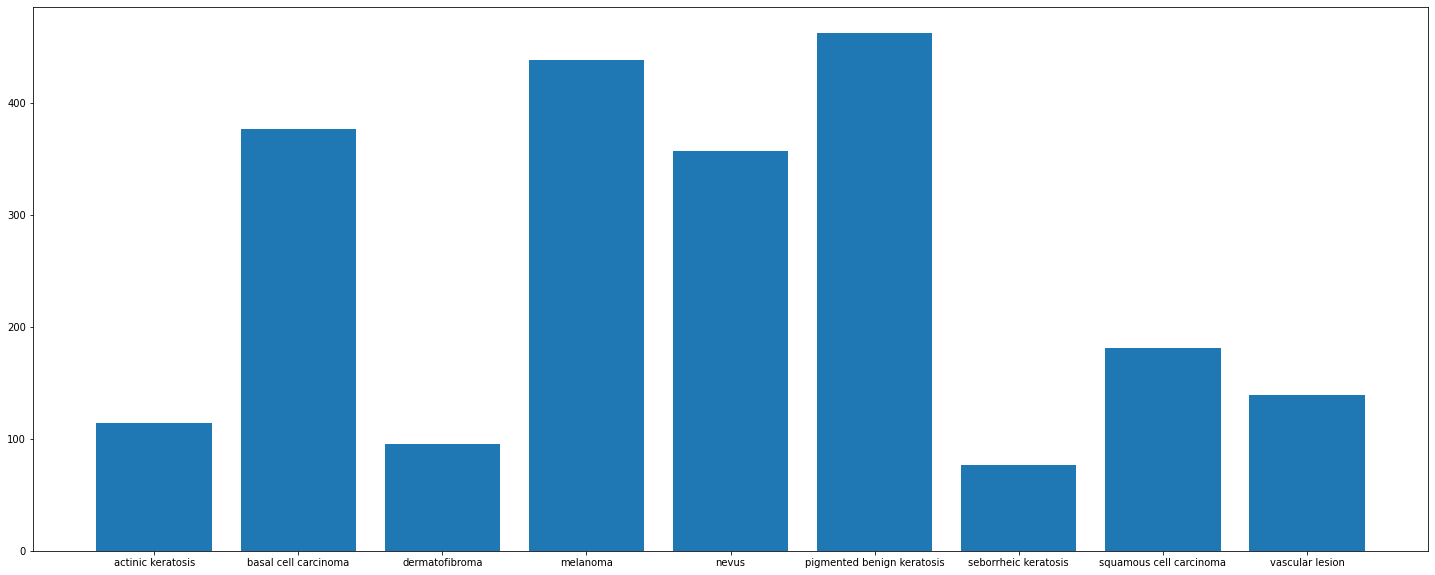

In [45]:
count = []
for i in class_names: 
  count.append(len(list(data_dir_train.glob(i + '/*.jpg'))))
plt.figure(figsize= (25,10))
plt.bar(class_names,count)

**FINDINGS**
Seborrheic keratosis has the least number of samples 
Melanoma and pigmented benign keratosis dominate 

In [46]:
!pip install Augementor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement Augementor (from versions: none)
ERROR: No matching distribution found for Augementor


In [47]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline("/content/drive/MyDrive/SkinCancerDetection/Train",save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) 

Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF69C06350>: 100%|██████████| 500/500 [01:03<00:00,  7.91 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to /content/drive/MyDrive/SkinCancerDetection/Train/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FCF6AC89850>:  76%|███████▌  | 379/500 [00:45<00:08, 13.80 Samples/s]

In [82]:
data_dir_train1 = pathlib.Path("/content/drive/MyDrive/SkinCancerDetection/Train/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

13500


In [83]:
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
1,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
2,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
3,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
4,/content/drive/MyDrive/SkinCancerDetection/Tra...,actinic keratosis
...,...,...
13495,/content/drive/MyDrive/SkinCancerDetection/Tra...,seborrheic keratosis
13496,/content/drive/MyDrive/SkinCancerDetection/Tra...,seborrheic keratosis
13497,/content/drive/MyDrive/SkinCancerDetection/Tra...,seborrheic keratosis
13498,/content/drive/MyDrive/SkinCancerDetection/Tra...,seborrheic keratosis


In [84]:
new_df['Label'].value_counts()

pigmented benign keratosis    3244
melanoma                      3143
basal cell carcinoma          2668
nevus                         2469
actinic keratosis              817
dermatofibroma                 651
seborrheic keratosis           188
squamous cell carcinoma        181
vascular lesion                139
Name: Label, dtype: int64

In [87]:
#Training the model 
batch_size = 32
img_height = 180
img_width = 180

import pathlib
#data_dir_train1=pathlib.Path("/content/drive/MyDrive/SkinCancerDetection/Train/output")
data_dir_train1=pathlib.Path("/content/drive/MyDrive/SkinCancerDetection/Train/output")

In [88]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

13500


In [90]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


data_dir_train1=pathlib.Path("/content/drive/MyDrive/SkinCancerDetection/Train/output")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13500 files belonging to 9 classes.
Using 10800 files for training.


In [91]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13500 files belonging to 9 classes.
Using 2700 files for validation.


In [92]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [93]:
## ### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [94]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


 40/338 [==>...........................] - ETA: 41:35 - loss: 2.0567 - accuracy: 0.1961

KeyboardInterrupt: ignored